In [1]:
import SOLVING_QKE_FUNCTION as solve
import numpy as np
import derivatives as der

In [2]:
def make_ics_eqm(N, Emax, eta_e, eta_mu):
    eps= np.linspace(Emax/N, Emax, N)
    ym0 = np.zeros((N,4))
    
    rho_ee = 1/(np.exp(eps-eta_e)+1)
    rho_mm = 1/(np.exp(eps-eta_mu)+1)

    for i in range(len(ym0)):
        p0 = rho_ee[i] + rho_mm[i]
        pz = (rho_ee[i] - rho_mm[i]) / p0
        ym0[i,:] = [p0,0,0,pz]

    
    rhobar_ee = 1/(np.exp(eps+eta_e)+1)
    rhobar_mm = 1/(np.exp(eps+eta_mu)+1)
    
    
    ym0_bar= np.zeros((N,4))
    for i in range(len(ym0_bar)):
        p0= rhobar_ee[i] + rhobar_mm[i]
        pz = (rhobar_ee[i] - rhobar_mm[i]) / p0
        ym0_bar[i,:]= [p0,0,0,pz]
        
    return der.newarray_maker(ym0,ym0_bar)

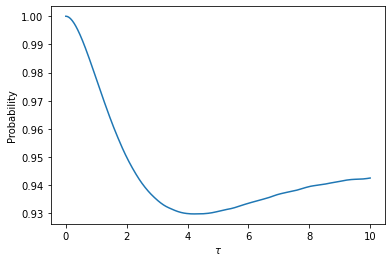

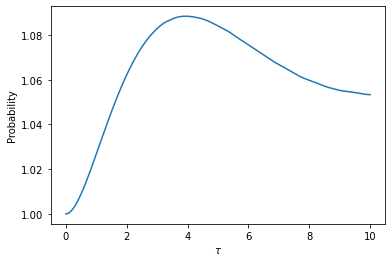

Data saved to file DataRun3/Run30.npz
966 time steps saved with dN = 5
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions True
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 0.12
CPU times: user 23.3 s, sys: 118 ms, total: 23.5 s
Wall time: 23.5 s


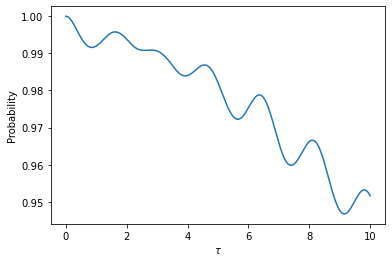

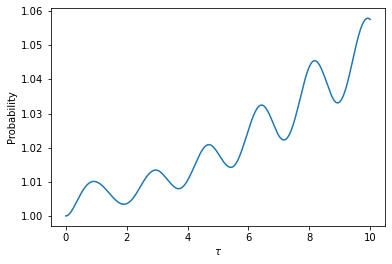

Data saved to file DataRun3/Run31.npz
969 time steps saved with dN = 5
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions True
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 0.25
CPU times: user 10.3 s, sys: 25 ms, total: 10.3 s
Wall time: 10.3 s


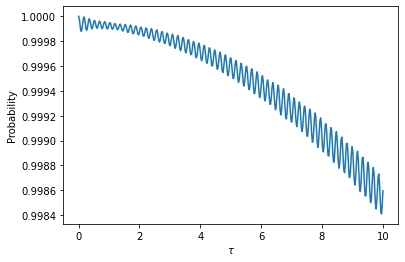

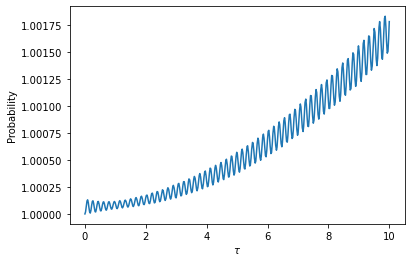

Data saved to file DataRun3/Run32.npz
449 time steps saved with dN = 15
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions True
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 0.44
CPU times: user 22.8 s, sys: 50.5 ms, total: 22.9 s
Wall time: 22.9 s


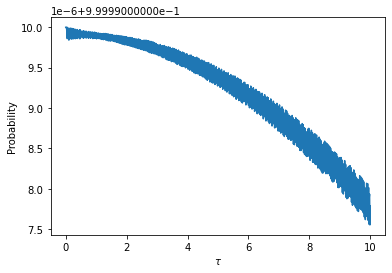

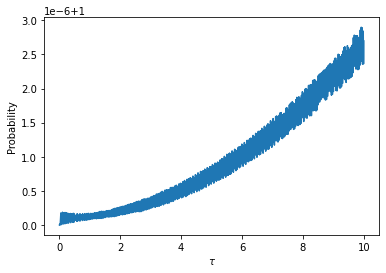

Data saved to file DataRun3/Run33.npz
949 time steps saved with dN = 140
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions True
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 1
CPU times: user 4min 42s, sys: 479 ms, total: 4min 42s
Wall time: 4min 42s


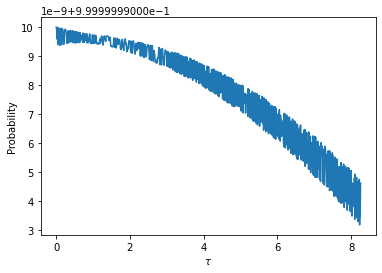

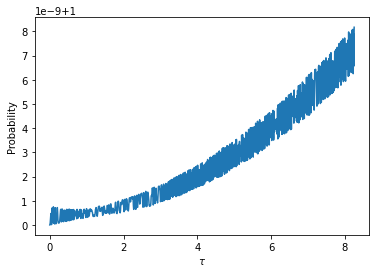

Data saved to file DataRun3/Run34.npz
1001 time steps saved with dN = 1755
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions True
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 2
CPU times: user 1h 41s, sys: 6.23 s, total: 1h 47s
Wall time: 1h 43s


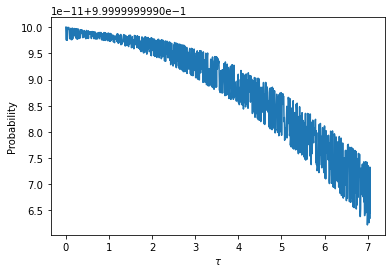

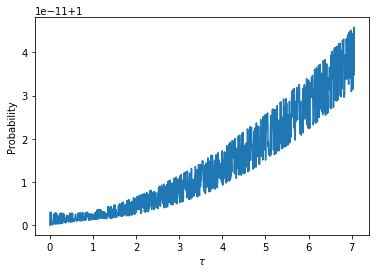

In [ ]:
%%time
T = [0.12, 0.25, 0.44, 1, 2, 4, 8]
foldername = "DataRun3"
basename = "Run"

eta_e = 0.1
eta_mu = -0.1

y0 = make_ics_eqm(200,10,eta_e, eta_mu)

for i in range(len(T)):
    %time solve.solve_QKE(T[i], y0, True, True, foldername, "Run3{}".format(i), incl_collisions=True, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu)    

In [ ]:
%%time
solve.solve_QKE(T[0], y0, True, True, foldername, "Run3{}-long".format(0), incl_collisions=True, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=50)

In [ ]:
%%time
solve.solve_QKE(T[1], y0, True, True, foldername, "Run3{}-long".format(1), incl_collisions=True, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=100)

In [ ]:
%%time
solve.solve_QKE(T[2], y0, True, True, foldername, "Run3{}-long".format(2), incl_collisions=True, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=1000)

In [ ]:
%%time
solve.solve_QKE(T[3], y0, True, True, foldername, "Run3{}-long".format(3), incl_collisions=True, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=500)

In [ ]:
%%time
solve.solve_QKE(T[4], y0, True, True, foldername, "Run3{}-long".format(4), incl_collisions=True, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=50)